<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 인공 신경망에 층을 추가하여 데이터셋을 분류하면 딥 -> 심층신경망

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤시드를 사용하고
# 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [9]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [10]:
from sklearn.model_selection import train_test_split

# 0~255 까지의 픽셀 값을 0~1로 만들어줌
train_scaled = train_input /255.0
# 28*28의 2차원 배열을 1차원 배열로 펼침
train_scaled = train_scaled.reshape(-1,28*28)

train_scaled, val_scaled, train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

print(test_input.shape,test_target.shape)

(10000, 28, 28) (10000,)


In [11]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [12]:
print(val_scaled.shape,val_target.shape)

(12000, 784) (12000,)


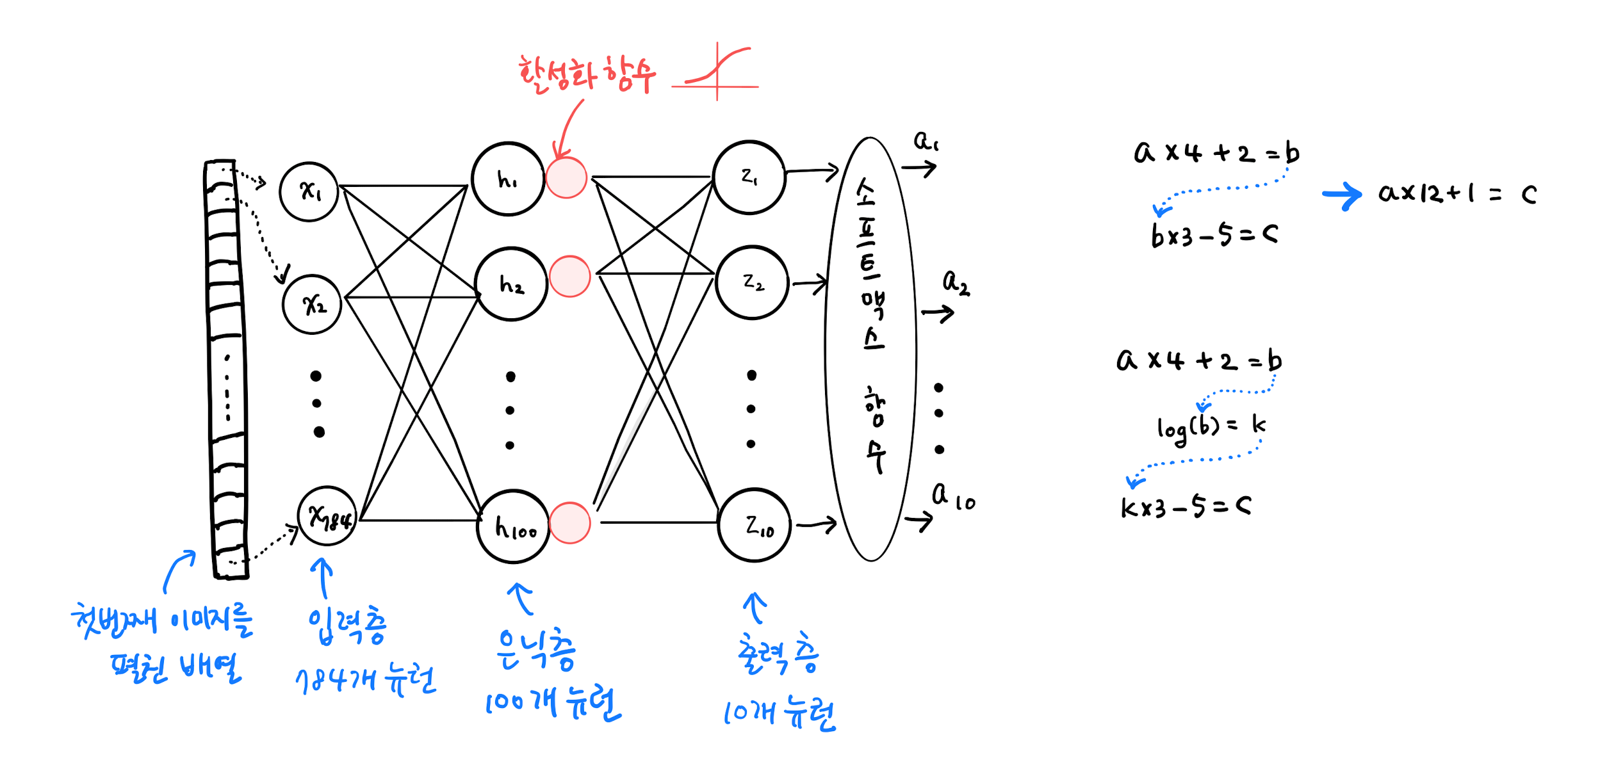

In [ ]:
# 인공신경망 모델에 2개의 레이어를 추가해 보겠다
# 전에 만든 신경망 모델과 다른 점은 입력층과 출력층 사이에 밀집 층이 추가된 것
#       -> 은닉층 (Hidden layar)
# 은닉층에는 주황색원으로 활성화 함수가 표시되어 있다
# 출력층이 적용하는 활성화 함수는 종류가 제한되어 있음
#   이진분류(시그모이드함수), 다중분류(소프트맥스함수)-> 분류를 위한
#   은닉층은 활성화 함수가 자유롭다. (대표적 : 시그모이드함수 볼 랭루 함수...)
# a*4+2*b ->b*3-5=c 라고 했을 때 b가 하는 일은 임시용 -> a*12+1=c

# 신경망도 마찬가지로 은닉층에서 선형적인 산술 계산만 수행한다면 수행할 역할이 없는셈
# 선형 계산을 적당하게 비선형적으로 비틀어 줘야함
# 그래야 다음 층의 계산과 단순이 합쳐지지않고 나음의 역활을 할 수 있다.
# a*4+2*b -> log(b)=k -> k*3-5=c 라고 했을 때 log(b)=k 가 하는 일은?

In [14]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스함수를 사용한 출력층을 케라스 danse클래스로 만들어보자
danse1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
# input_shape=(784,) 입력크기(필수)

# danse1 이 은닉층이고 100개의 뉴런을 가진 밀집층, 활성화 함수를 시그모이드로 설정
# 몇개의 뉴런이 필요할지는 경험적으로 기입
# 제약사항으로는 적어도 출력층의 뉴런보다는 많게 만들어야 한다
# (클래스 10개에 대한 확률을 예측해야하는데 은닉층의 뉴런이 10개이하면 안된다)

danse2 = keras.layers.Dense(10,activation='softmax')
# danse2 는 출력층으로 설정 (10개의 클래스를 분류하므로 10개의 뉴런을 둠)
# 활성화 함수로 소프트맥스 함수를 지정

In [16]:
# 심층 신경망 만들기
model = keras.Sequential([danse1,danse2])

# 위에서 만든 danse1,danse2를 Sequential클래스에 추가하영 심층(deep)신경망을 만듬
# danse1,danse2를 리스트로 만들어 전달함
# 주의 : 뒤에가 출력층임으로 danse2를 설정
# 인공 신경망의 강력한 성능은 층을 추가하여 입력데이터에 대해
# 연속적인 학습을 진행하는 능력 -> 2개이상 층을 추가 가능

In [17]:
model.summary() # 층에 대한 유용한 정보가 나옴
# 맨 첫줄에 모델의 이름
# 그 다음 이모델이 들어 있는 층이 순서대로 나옴
# 맨 처음 추가한 은닉층에서 출력층의 순서대로 나옴
# 층이름(클래스), 출력크기, 모델 파라미터개수
# 층이름을 지정하지않으면 케라스가 자동으로 danse 라고 이름을 붙임
# 출력크기 (None(샘플의개수: 아직 정의되지않음),100)
#           -> 케라스 모델의 fit()매서드에 훈련데이터를 주입하면
#               이데이터를 한번에 모두 사용하지않고 잘게 나누어
#               여러번에 걸쳐 경사 하강법 단계를 수행 (미니배치 경사 하강법)
#               케라스의 기본 미니배치 그기는 32개임

# 이 값은 fot()매서드에서 batch_size 매개변수로 변경가능 따라서
# 샘플 개수를 교정하지 않고 어떤 배치 크기에도 유연하게[ 대응할 수 있도록 None으로 설정이 최선

# 신경망 층에서 입력되거나 출력되는 배열의 첫 번쨰 차원을 배치 자원이라고 부름

# 출력크기 (None,100 -> 은닉층의 뉴런 개수를 100개임으로 100개의 출력이 나옴)
#  -> 샘플마다 784개의 픽셀값이 은닉층을 통과하면서 100개의 특성으로 압충
#       마지막으로 파라미터 개수가 출력되; 784 * 100 + 100 = 78500

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 두번째 층의 출력 크기 (None,10) -> 뉴런 개수 가 10개임
# 파라미터는 100 * 10 + 10 = 1010

# 맨 아래 있는 Non-trainable params: 0  (0.00 B) 훈련되지 않은 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터# 두번째 층의 출력 크기 (None,10) -> 뉴런 개수 가 10개임
# 파라미터는 100 * 10 + 10 = 1010

# 맨 아래 있는 Non-trainable params: 0  (0.00 B) 훈련되지 않은 파라미터
# (간혹 경사 하강법으로 훈련되지 않는 파라미터를 가진 층의 파라미터

In [21]:
# 두 번째 심층 만드는 방법

# Sequential 클래스에 층을 추가하는 다른 방법
# 앞에 2개의 Danse는 따로 저장하여 쓸일이 없기 때문에
# 아래 코드처럼 Sequential 클래스의 생성자 안에서 따로 Danse클래스의 객체를 만드는 경우가 많다.

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
                                                # name='hidden' 레이어 이름 정의(영어만!)
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# 층(layar) 추가시 가장 편한 방법은 add()를 사용한다.
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 모델 훈련 시작
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_scaled,train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7546 - loss: 0.7711
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8460 - loss: 0.4272
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8587 - loss: 0.3876
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8674 - loss: 0.3627
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8747 - loss: 0.3438


In [ ]:
# 한개의 층으로만 돌렸을때에는 정확도가 85.37%
# 두개의 층으로 돌렸을때에는 정확도가 87.47%
# 레이어를 늘려 했을때 보다 정확도가 올라갔다.

In [24]:
# 훈련결과를 보면 훈련세트에 대한 성능이 추가된 층이 성능을 향상시켰다 라는것을 잘알수있다 검증역시 해보자
model.evaluate(val_scaled,val_target) # 검증 점수 86.84%

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8684 - loss: 0.3606


[0.3643481135368347, 0.8639166951179504]

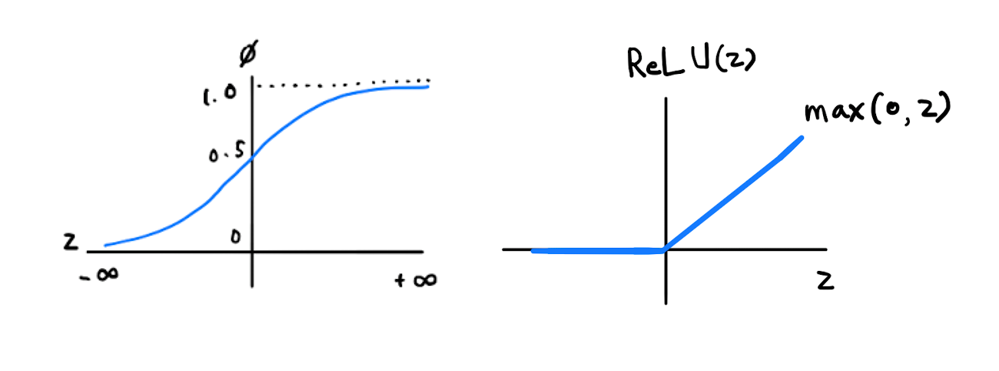

In [ ]:
# 초창기 인공 신경망의 은닉층에서 많이 사용된 활성화 함수는 시그모이드 함수였지만
# 단점이 오른쪽, 윈쪽 끝으로 갈수록 그래프가 누워 올바른 출력을 만드는데 신속하게 대응하지 못한다
# 특히 층이 많은 심층 신경망 일수록 그 효과가 누적되어 학습을 더 어렵게 만듬

# 개선을 위해서 다른 종류의 활성화함수가 제안되었는데 바로 렐루(RelU) 함수임
# 렐루 함수는 입력이 양수 일 경우 마치 활성화 함수가 없는 것 처럼
# 그냥 입력을 통과시키고 음수일 경우 0으로 만든다
# 렐루 함수는 max(0,z)와 같이 씀 -> z가 0보다 크면 z를 출력하고 0보다 작으면 0을 출력

# 렐루 함수는 특히 이미지 처리에 좋은 성능을 낸다고 함
# 은닉층에 활성화 함수에 시그모이드 함수 대신 렐루 함수를 적용하기 전에

# 케라스에서 제공하는 편리한 층 하나가 있다 -> Flatten
# Flatten(플래튼) : 단조롭게하다
# 클래스는 배치 자원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할만 함 (가중치,정편 없음)

# 절편 : 직선이 y축과 만나는 점의 x좌표(x절편) 및 y축과 만나는 점의 y좌표(y절편)을 통틀어 이르는 말
# 하지만 플래튼 클래스를 층처럼 입력층과 은닉층 사이에 추가하기 때문에 이를 층이라고 부른다
# 입력층 바로 뒤에 플래튼 층 추가

In [26]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28))) # 입력층 바로 뒤에 플래튼 층 추가
# 플래튼 클래스에 포함된 파라미터는 0개로 케라스의 플래튼 층을 신경망 모델에 추가하면
# 입력값의 차원을 짐작할 수 있는 것이 장점이 된다

# (None, 784)  -> 784개의 입력이 첫번째 은닉층에 전달됨을 알 수 있다
model.add(keras.layers.Dense(100, activation='relu'))       # 렐루 층      True or False 를 1단계에서 수행함
model.add(keras.layers.Dense(10, activation='softmax'))    # 소프트맥스 층          # 다중분류
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# 훈련 데이터를 준비해서 모델 훈련 시작
# reshape() 매서드 제외 : 2차원 해상도 값을 그대로 사용해 보기 위함
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255

train_scaled, val_scaled, train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [28]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled,train_target,epochs=5) # 전과 비교해보면 조금 향상됨

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7651 - loss: 0.6742
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8529 - loss: 0.4051
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8705 - loss: 0.3579
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8810 - loss: 0.3325
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8870 - loss: 0.3163


In [29]:
model.evaluate(val_scaled,val_target)# 검증 점수 전 (86.84%)과 비교해보면 조금 떨어짐 ,,,,....???????

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8668 - loss: 0.3850


[0.38626110553741455, 0.8660833239555359]